Python script that regional plots maps of example cases for each type of ITCZ state using IMERG observations.

In [3]:
#Author: Alex Gonzalez
#Date: November 2025
#Paper: JGR-Atmospheres

Figure 3. Examples of the decisions made by the ITCZ states algorithm over the east Pacific
region (90◦W–135◦W) for 21 February 1998 (eITCZ, row 1), 6 March 2018 (sITCZ, row 2), 16
March 2018 (nITCZ, row 3), 17 March 2018 (aITCZ, row 4), and 27 March 2018 (dITCZ, row
5). The left column shows raw daily average IMERG combined microwave and IR precipitation
(mm day−1), the middle column shows the daily average IMERG combined microwave and IR
precipitation (mm day−1) after a 5◦-longitude running mean is applied and only values above the
5 mm day−1 threshold are retained, and the right column shows visible satellite imagery from
NOAA’s Global ISCCP B1 Browse System (top row) and NASA’s Earth Polychromatic Imaging
Camera (bottom four rows). Longitudinal ITCZ states are shown via raster contours (nITCZ in
white, sITCZ in gold, aITCZ in red, dITCZ in blue, and eITCZ in black) below each plot in the
middle column.
–

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# Input folder and daily precip file
dri = '/srv/lss/IMERG_1deg/total_precip/'
fn  = 'imerg_1deg_1998-2024_daily.nc'
dataset = 'IMERG'

region = 'EastPac'
#region = 'Atlantic'

clon = 0
#clon = -180

# open data
data = xr.open_dataset(dri+fn)#, engine='netcdf4') 

In [3]:
# precipitation threshold in mm/day
pr_tropics_low = 5.0
rain_thresh = str(pr_tropics_low)+'mm'

figfolder = '/home/alex.gonzalez/CMIP6_ITCZ_state_project/figures/methods_paper/revision/'
figname = 'ITCZ_state_EastPac_examples_'+rain_thresh+'.pdf'

In [4]:
if dataset == 'IMERG':
    # netcdf name for precipitation (IMERG)
    nc_name = 'precipitation' # units of mm day^{-1}
    unit_const = 1 # to convert to mm day^{-1}
    
    # original netcdf names for latitude and longitude
    lat_name = 'lat'
    lon_name = 'lon'

# new names for latitude and longitude
lat_name_f = 'lat'
lon_name_f = 'lon'

# months of interest
mn0 = 1
mnf = 12

# time select (for map plots)
time_index = False # if you want to use itsel rather than tsel 
tsels = ['1998-02-21T00:00:00.000000000','2018-03-06-T00:00:00.000000000','2018-03-16-T00:00:00.000000000','2018-03-17-T00:00:00.000000000','2018-03-27-T00:00:00.000000000'] # 3-13

#----------------------------------------------------------------#
##### THE USER MUST KNOW THE ORDER OF LATITUDE AND LONGITUDE #####
##### AND ORDER ALL VLAUES BELOW CONSISTENT WITH THIS ORDER #####
#----------------------------------------------------------------#
# longitudes of interest (may need to be changed for different grids)
# east Pacific is 90-135W

lon0_epac = -135
lon1_epac = -90

lon0_atla = -40
lon1_atla = 5

lon0_indo = 50
lon1_indo = 95

lon0_wpac = 155
lon1_wpac = 200

# "tropical" latitudes (may need to be changed for different grids)
lat0 = -20
lat1 = 20

# off-equatorial latitudes – must be positive only (may need to be changed for different grids)
lat0_offEQ = 2
lat1_offEQ = 20

# equatorial latitudes (may need to be changed for different grids)
lat0_EQ = -1
lat1_EQ = 1

#---------------------------USER INPUTS-----------------------------#
if region == 'EastPac':
    region_str = 'East Pacific Ocean (90-135W)'
    lon0 = lon0_epac
    lon1 = lon1_epac

if region == 'Atlantic':
    region_str = 'Atlantic Ocean (5E-40W)'

    lon0 = lon0_atla
    lon1 = lon1_atla

clon = 0
#clon = -180

In [5]:
time_all = data['time']
time_all

<xarray.DataArray 'time' (time: 9831)>
array(['1998-01-01T00:00:00.000000000', '1998-01-02T00:00:00.000000000',
       '1998-01-03T00:00:00.000000000', ..., '2024-11-28T00:00:00.000000000',
       '2024-11-29T00:00:00.000000000', '2024-11-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2024-11-30
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [6]:
nt = len(tsels)

In [7]:
data

<xarray.Dataset>
Dimensions:        (time: 9831, lon: 360, lat: 101)
Coordinates:
  * time           (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2024-11-30
  * lon            (lon) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * lat            (lat) float64 -50.0 -49.0 -48.0 -47.0 ... 47.0 48.0 49.0 50.0
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/15)
    CDI:             Climate Data Interface version 2.0.4 (https://mpimet.mpg...
    Conventions:     CF-1.6
    BeginDate:       1998-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         1998-01-01
    EndTime:         23:59:59.999Z
    ...              ...
    DOI:             10.5067/GPM/IMERGDF/DAY/07
    ProductionTime:  2024-11-06T16:23:03.571Z
    history_L34RS:   'Created by L34RS v1.4.4 @ NASA GES DISC on April 21 202...
    NCO:             netCDF Operators version 5.0.6 (Homepage = http://nco.sf...
    history:         Mon Apr 21 12:09:50 2025: cdo sorttimestamp -cat imerg_1...
    CDO:             Climate Data Operators version 2.0.4 (https://mpimet.mpg...

In [8]:
pr = data[nc_name].sel(time=tsels,method='nearest').rename({lat_name: lat_name_f,lon_name: lon_name_f})*unit_const 
# .transpose('time',lat_name,lon_name) # transpose is needed for NASA data 
pr

<xarray.DataArray 'precipitation' (time: 5, lat: 101, lon: 360)>
array([[[2.76874995e+00, 2.09625006e+00, 1.73624992e+00, ...,
         1.55624986e+00, 4.40874958e+00, 9.98749971e-01],
        [8.69999945e-01, 7.21249998e-01, 5.71999979e+00, ...,
         0.00000000e+00, 3.74999992e-03, 1.42374992e+00],
        [6.98750019e-01, 5.25124979e+00, 4.87749958e+00, ...,
         0.00000000e+00, 4.30000007e-01, 1.75000001e-02],
        ...,
        [1.14125001e+00, 8.43749881e-01, 9.14999902e-01, ...,
         1.64374971e+00, 8.32499981e-01, 4.74999964e-01],
        [1.71250001e-01, 4.99999940e-01, 2.99999975e-02, ...,
         5.13750017e-01, 2.66249985e-01, 1.29999995e-01],
        [1.24999993e-02, 3.24999988e-02, 1.12499995e-02, ...,
         4.06250000e-01, 9.37500000e-02, 1.24999997e-03]],

       [[5.69999993e-01, 1.22499995e-01, 6.11249983e-01, ...,
         9.07499909e-01, 4.06250000e-01, 2.15750003e+00],
        [0.00000000e+00, 1.99999996e-02, 2.87750006e+00, ...,
         6.17499948e-01, 0.00000000e+00, 0.00000000e+00],
        [5.13749957e-01, 3.65999985e+00, 1.87500007e-02, ...,
         2.49999994e-03, 0.00000000e+00, 0.00000000e+00],
...
        [7.12250042e+00, 1.10650005e+01, 2.28499985e+00, ...,
         1.28800001e+01, 1.12537508e+01, 7.70375013e+00],
        [1.38462496e+01, 7.00125027e+00, 6.79374981e+00, ...,
         1.76874995e+00, 4.32375002e+00, 8.84249973e+00],
        [3.34246993e+00, 7.54328966e+00, 1.13435974e+01, ...,
         2.16969752e+00, 2.86738205e+00, 2.26533461e+00]],

       [[1.75912495e+01, 1.32637501e+01, 5.75500011e+00, ...,
         5.31374979e+00, 7.04124928e+00, 1.08575001e+01],
        [1.41687489e+01, 5.79749966e+00, 4.30249977e+00, ...,
         8.04625034e+00, 1.07462511e+01, 2.21000004e+01],
        [7.37874985e+00, 6.59124947e+00, 7.94750023e+00, ...,
         8.14499950e+00, 1.47887487e+01, 8.48749924e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.25000009e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.49999976e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.84120062e-04, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-21 2018-03-06 ... 2018-03-27
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float64 -50.0 -49.0 -48.0 -47.0 -46.0 ... 47.0 48.0 49.0 50.0

In [1]:
# precip only over our region of interest
pr_region = pr.sel(lat=slice(lat0,lat1),lon=slice(lon0,lon1))
#pr_region

NameError: name 'pr' is not defined

In [2]:
# global running average precipitation (for now it is over 2 degrees longitude west and 2 degrees east of grid points, 5 points)
pr_all_run = pr.sel(lat=slice(lat0,lat1)).rolling(lon=5, center=True, min_periods=1).mean()
#pr_all_run

NameError: name 'pr' is not defined

In [88]:
# now subset running average precip only our region of interest
pr_region_run = pr_all_run.sel(lon=slice(lon0,lon1))
#pr_region_run

<xarray.DataArray 'precipitation' (time: 5, lat: 41, lon: 46)>
array([[[1.40474999e+00, 7.70749986e-01, 3.76750022e-01, ...,
         1.44999996e-02, 1.44999996e-02, 2.49999983e-04],
        [2.06625009e+00, 2.53500009e+00, 2.03824973e+00, ...,
         2.17499994e-02, 3.00000003e-03, 0.00000000e+00],
        [1.42474997e+00, 1.89074993e+00, 1.80425000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.45000024e-02, 5.45000024e-02, 6.19999990e-02, ...,
         1.12499995e-02, 1.12499995e-02, 1.12499995e-02],
        [1.06749997e-01, 1.33749992e-01, 1.29250005e-01, ...,
         2.49999983e-04, 2.49999983e-04, 2.49999983e-04],
        [1.49999987e-02, 8.74999911e-03, 3.34999971e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[7.72750020e-01, 7.93500006e-01, 8.00999999e-01, ...,
         2.99999956e-02, 3.74999968e-03, 3.74999968e-03],
        [3.91249955e-01, 2.86250025e-01, 3.06750000e-01, ...,
         5.22499979e-02, 4.74999985e-03, 1.79999974e-02],
        [8.16749930e-01, 3.80499989e-01, 1.11249998e-01, ...,
         1.62499994e-02, 2.17499994e-02, 7.57500082e-02],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.99999989e-03, 4.99999989e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.97749996e-01, 2.97749996e-01, 2.97749996e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.43249983e-01, 4.80499983e-01, 1.03974998e+00, ...,
         1.01750001e-01, 1.01499997e-01, 2.49999983e-04],
        [1.61800003e+00, 1.79849982e+00, 1.51274991e+00, ...,
         1.43249989e-01, 1.11749984e-01, 8.39999914e-02],
        [7.45750010e-01, 8.69750023e-01, 1.04775000e+00, ...,
         1.00749992e-01, 7.92499930e-02, 1.27999991e-01],
        ...,
        [9.03749943e-01, 8.58499885e-01, 7.26499915e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.23275018e+00, 5.12250006e-01, 3.52750003e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.54000008e-01, 3.16500008e-01, 3.60249996e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-21 2018-03-06 ... 2018-03-27
  * lon      (lon) float64 -135.0 -134.0 -133.0 -132.0 ... -92.0 -91.0 -90.0
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0

In [89]:
nlat = len(pr_region[lat_name_f])
nlon = len(pr_region[lon_name_f])
nt = len(pr_region)

In [15]:
dri = '/srv/lss/IMERG_1deg/total_precip/'
fn  = 'IMERG_ITCZ_st_daily_'+region+'_abs_thresh_'+rain_thresh+'.nc'
data = xr.open_dataset(dri+fn)

In [16]:
itcz_state_new_xr_init = data['itcz_state']#.reset_coords(names=('lat'), drop=True)
itcz_state_new_xr_init

<xarray.DataArray 'itcz_state' (time: 9831)>
[9831 values with dtype=float64]
Coordinates:
  * time      (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2024-11-30
    quantile  float64 ...
Attributes:
    long_name:            IMERG daily ITCZ state
    method:               Algorithm developed for daily averaged precipitatio...
    region:               East Pacific Ocean (90-135W)
    precip_threshold:     90th percentile of regional zonally averaged precip
    longitude_threshold:  58 percent of gridpoints must agree on ITCZ state
    ITCZ state numbers:   1=dITCZ, 2=nITCZ, 3=sITCZ, 4=aITCZ, 5=eITCZ

In [24]:
itcz_state_tmpa.sel(time=tsels)

<xarray.DataArray 'itcz_state' (time: 5)>
array([5., 3., 2., 4., 1.])
Coordinates:
  * time      (time) datetime64[ns] 1998-02-21 2018-03-06 ... 2018-03-27
    quantile  float64 0.9
Attributes:
    long_name:            IMERG daily ITCZ state
    method:               Algorithm developed for daily averaged precipitatio...
    region:               East Pacific Ocean (90-135W)
    precip_threshold:     90th percentile of regional zonally averaged precip
    longitude_threshold:  58 percent of gridpoints must agree on ITCZ state
    ITCZ state numbers:   1=dITCZ, 2=nITCZ, 3=sITCZ, 4=aITCZ, 5=eITCZ

In [19]:
itcz_state_lon = data['itcz_state_lon']
itcz_state_lon = itcz_state_lon.sel(time=tsels)

In [20]:
itcz_state_lon_1 = np.where(itcz_state_lon==1,40,0)
itcz_state_lon_2 = np.where(itcz_state_lon==2,10,0)
itcz_state_lon_3 = np.where(itcz_state_lon==3,20,0)
itcz_state_lon_4 = np.where(itcz_state_lon==4,30,0)
itcz_state_lon_5 = np.where(itcz_state_lon==5,50,0)

In [21]:
itcz_state_lon

<xarray.DataArray 'itcz_state_lon' (time: 5, lon: 46)>
array([[5, 5, 5, ..., 5, 5, 5],
       [2, 2, 2, ..., 3, 3, 3],
       [4, 3, 3, ..., 1, 1, 1],
       [1, 3, 3, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 3]])
Coordinates:
  * time      (time) datetime64[ns] 1998-02-21 2018-03-06 ... 2018-03-27
    quantile  float64 ...
  * lon       (lon) float64 -135.0 -134.0 -133.0 -132.0 ... -92.0 -91.0 -90.0
Attributes:
    long_name:           IMERG daily ITCZ state as a function of longitude
    ITCZ state numbers:  1=dITCZ, 2=nITCZ, 3=sITCZ, 4=aITCZ, 5=eITCZ

In [22]:
itcz_state_lon_plt = (itcz_state_lon_1+itcz_state_lon_2 + itcz_state_lon_3 + itcz_state_lon_4 + itcz_state_lon_5)/10

In [23]:
#itcz_state_lon_xr = xr.DataArray(itcz_state_lon, coords=

In [24]:
itcz_state_lon[0,:].values

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5])

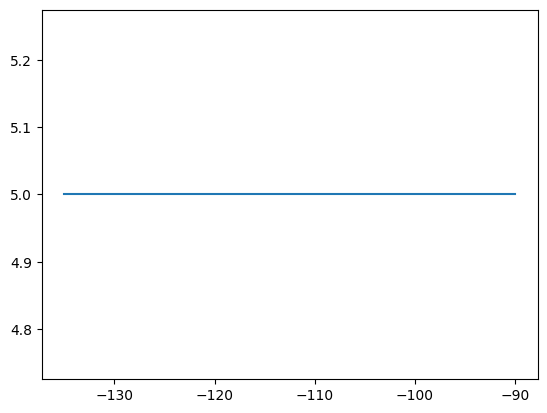

In [25]:
plt.plot(itcz_state_lon['lon'],itcz_state_lon[0,:])

In [31]:
import matplotlib
levc = np.arange(1., 14., 1.)
color_map = matplotlib.colormaps['Blues']

In [33]:
pr_region_run_thresh_plt = pr_region_run.where(pr_region_run>=pr_tropics_low)
#pr_region_run_thresh_plt

In [34]:
pr_region_run_thresh_plt.min()

<xarray.DataArray 'precipitation' ()>
array(5.00075, dtype=float32)

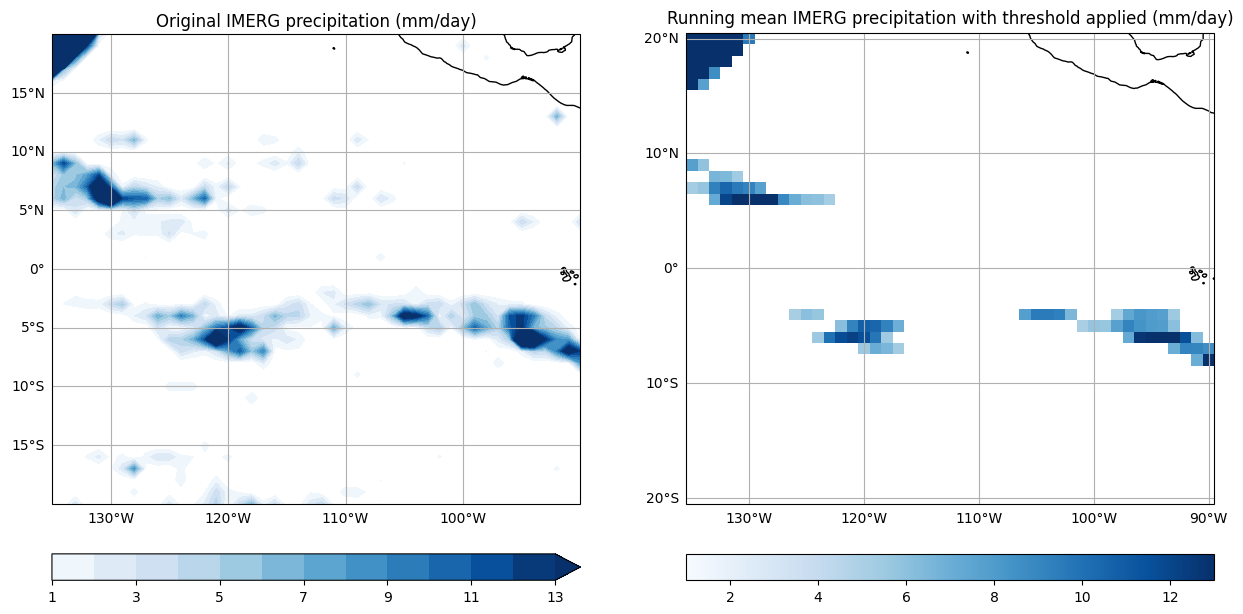

In [39]:
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 13))#, tight_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(1,npan,j+1,projection=ccrs.PlateCarree(central_longitude=clon))
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False
    if j == 0:
        plt.title('Original '+dataset+' precipitation (mm/day)')
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.T[1,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        cb = plt.colorbar(cf, orientation='horizontal', pad=0.05)
    if j == 1:
        plt.title('Running mean '+dataset+' precipitation with threshold applied (mm/day)')
        #cf = plt.contourf(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt.T[1,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      #levels=levc, extend ='max')
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt[1,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)
        cb = plt.colorbar(cf, orientation='horizontal', pad=0.05)

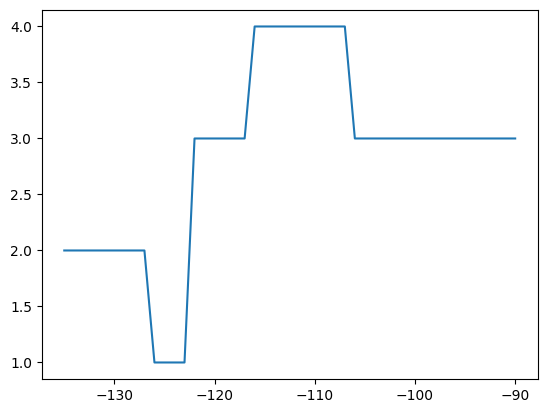

In [40]:
plt.plot(itcz_state_lon['lon'],itcz_state_lon[1,:])

In [41]:
itcz_state_lon[1,:]

<xarray.DataArray 'itcz_state_lon' (lon: 46)>
array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Coordinates:
    time      datetime64[ns] 2018-03-06
    quantile  float64 ...
  * lon       (lon) float64 -135.0 -134.0 -133.0 -132.0 ... -92.0 -91.0 -90.0
Attributes:
    long_name:           IMERG daily ITCZ state as a function of longitude
    ITCZ state numbers:  1=dITCZ, 2=nITCZ, 3=sITCZ, 4=aITCZ, 5=eITCZ

In [42]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [43]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = mpl.colormaps['viridis']#.resampled(8)

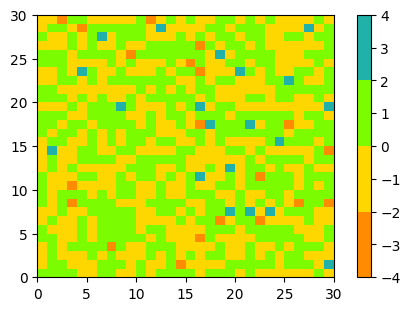

In [44]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

In [45]:
# make our own colormap using the colors from https://personal.sron.nl/~pault/
newcolors = viridis(np.linspace(0, 1, 5))
white = np.array([256/256, 256/256, 256/256, 1])
yellow = np.array([221/256, 170/256, 51/256, 1])
red = np.array([187/256, 85/256, 102/256, 1])
blue = np.array([0/256, 68/256, 136/256, 1])
black = np.array([0/256, 0/256, 0/256, 1])
#red

In [46]:
newcolors[0, :] = white
newcolors[1, :] = yellow
newcolors[2, :] = red
newcolors[3, :] = blue
newcolors[4:, :] = black

In [47]:
newcolors.shape

(5, 4)

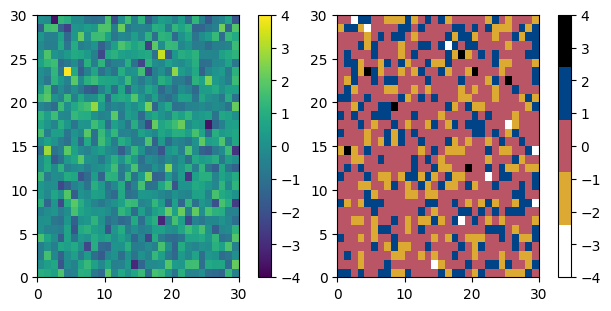

In [48]:
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

In [52]:
levc_pc = np.arange(1.5, 6.5, 1.)
color_map_new = matplotlib.colormaps.get_cmap(newcmp)
levc_pc

array([1.5, 2.5, 3.5, 4.5, 5.5])

In [53]:
lat_raster = pr[lat_name_f].sel(lat=slice(-22,22))
nlat_raster = len(lat_raster)

In [54]:
raster_itcz_state = np.zeros((len(tsels),nlat_raster,nlon))
#raster_itcz_state = pr_region_run*0

raster_itcz_state[:,0,:] = itcz_state_lon_plt
raster_itcz_state[:,1,:] = itcz_state_lon_plt

In [55]:
ticks = np.linspace(1.4, 4.6, 5)#[1.5,2.5,3.5,4.5,5.5]#np.linspace(1.1, 6.1, 6)
ticks

array([1.4, 2.2, 3. , 3.8, 4.6])

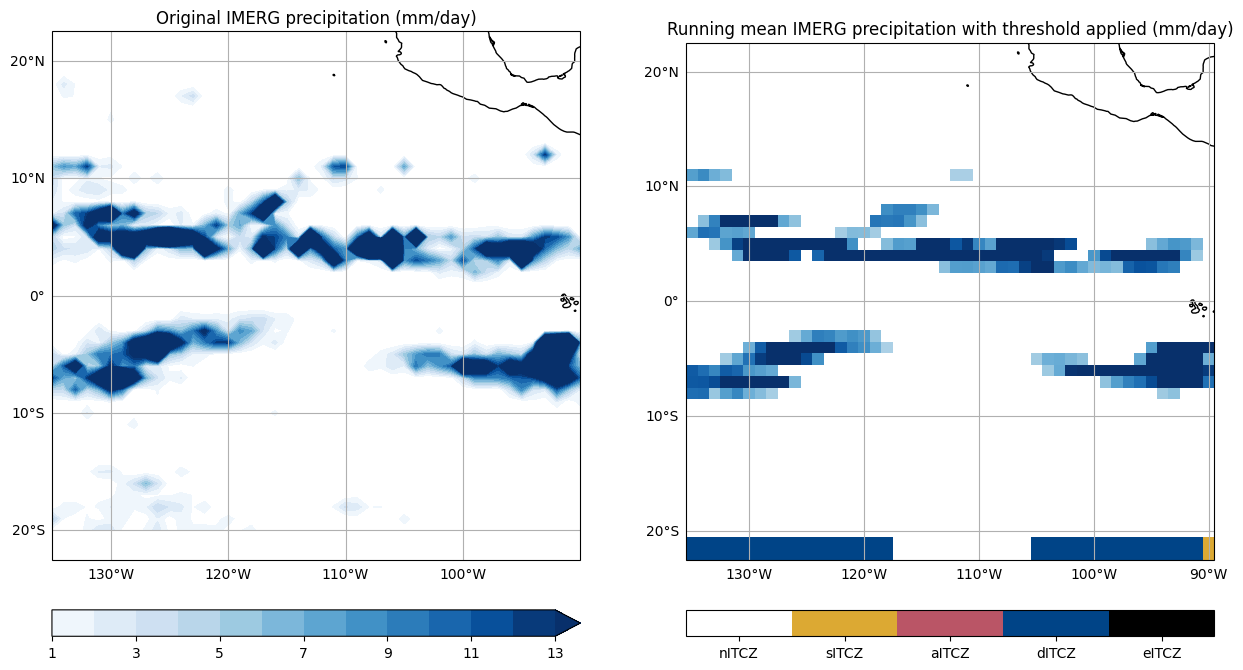

In [69]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 13))#, tight_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(1,2,j+1,projection=ccrs.PlateCarree(central_longitude=clon))
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False
    plt.ylim(-22.5,22.5)
    if j == 0:
        plt.title('Original '+dataset+' precipitation (mm/day)')

        #cf2 = plt.pcolormesh(pr_region[lon_name_f], pr_region[lat_name_f],raster_test, shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.T[4,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        cb = plt.colorbar(cf, orientation='horizontal', pad=0.05)
        
    if j == 1:
        plt.title('Running mean '+dataset+' precipitation with threshold applied (mm/day)')

        cf2 = plt.pcolormesh(pr_region_run[lon_name_f], lat_raster, raster_itcz_state[4,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)

        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt[4,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)
        #cb = plt.colorbar(cf, orientation='horizontal', pad=0.05)
        cb2 = plt.colorbar(cf2, ticks=ticks, orientation = 'horizontal',pad=0.05) # 
        cb2.ax.set_xticklabels(['nITCZ','sITCZ','aITCZ','dITCZ','eITCZ'])



In [82]:
pr_region.sel({'time':tsels[0]})

<xarray.DataArray 'precipitation' (lon: 46, lat: 41)>
array([[3.6000001e-01, 1.9374999e-01, 0.0000000e+00, ..., 1.3750000e-02,
        4.9999999e-03, 2.3749998e-02],
       [6.1000001e-01, 3.5424998e+00, 1.5375000e-01, ..., 7.4999998e-03,
        2.4999999e-03, 0.0000000e+00],
       [9.0749997e-01, 3.6837499e+00, 5.7137499e+00, ..., 2.4250001e-01,
        4.9624997e-01, 1.4999999e-02],
       ...,
       [1.2500000e-03, 0.0000000e+00, 0.0000000e+00, ..., 5.6249999e-02,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2500000e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1998-02-21
  * lon      (lon) float64 -135.0 -134.0 -133.0 -132.0 ... -92.0 -91.0 -90.0
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0

In [84]:
pr_region[lat_name_f]

<xarray.DataArray 'lat' (lat: 41)>
array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.])
Coordinates:
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

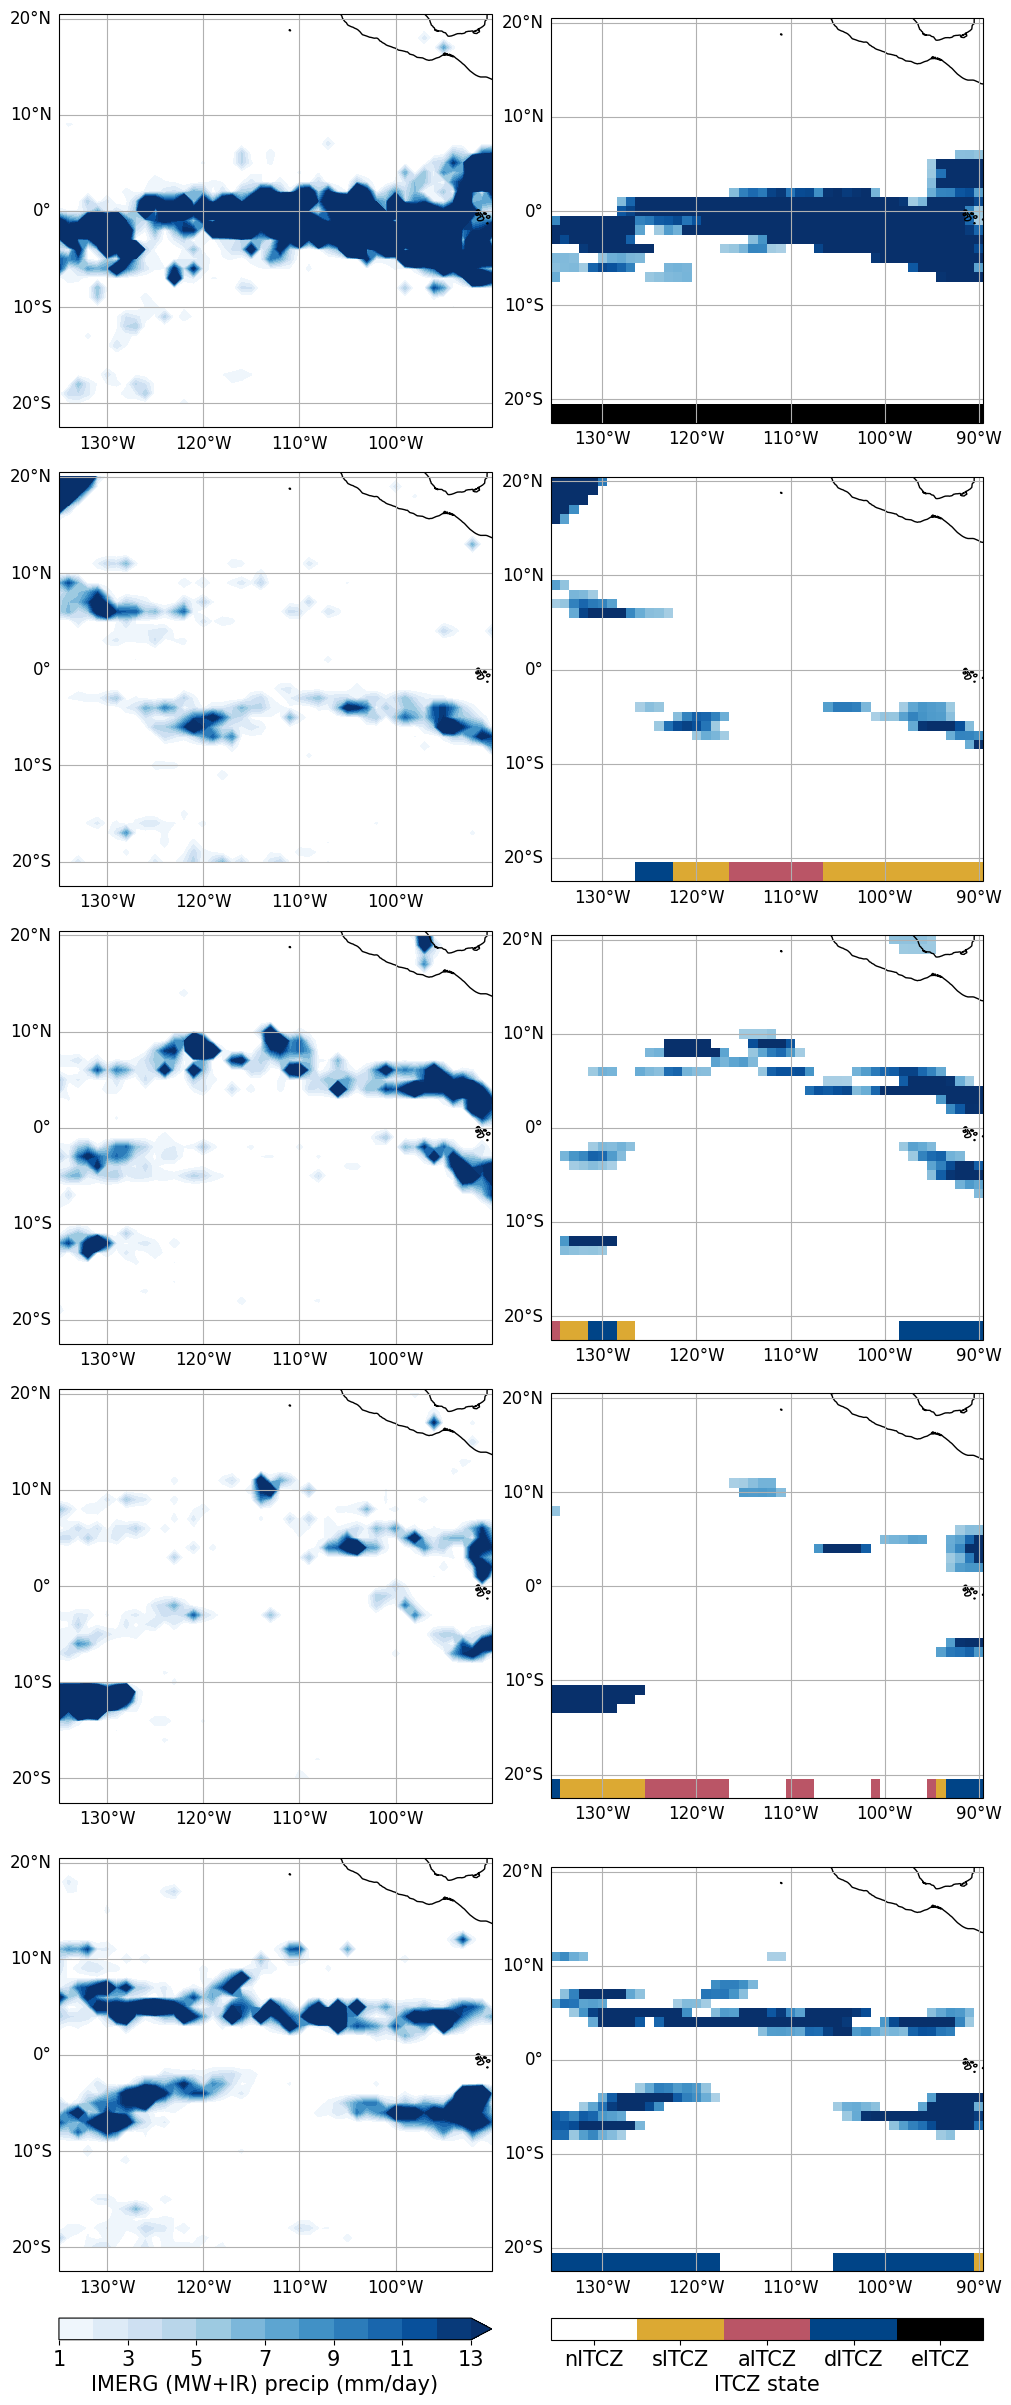

In [100]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
npan = 10
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(10, 24), constrained_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(5,2,j+1,projection=ccrs.PlateCarree(central_longitude=clon))
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False
    
    gl.xlabel_style = {'size': 12, 'color': 'k'}
    gl.ylabel_style = {'size': 12, 'color': 'k'}
    plt.ylim(-22.5,20.5)
    if j == 0:
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.sel({'time':tsels[0]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        
    if j == 1:
        cf2 = plt.pcolormesh(pr_region[lon_name_f], lat_raster, raster_itcz_state[0,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt.sel({'time':tsels[0]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)

    if j == 2:
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.sel({'time':tsels[1]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        
    if j == 3:
        cf2 = plt.pcolormesh(pr_region[lon_name_f], lat_raster, raster_itcz_state[1,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt[1,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)

    if j == 4:
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.sel({'time':tsels[2]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        
    if j == 5:
        cf2 = plt.pcolormesh(pr_region[lon_name_f], lat_raster, raster_itcz_state[2,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt[2,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)

    if j == 6:
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.sel({'time':tsels[3]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        
    if j == 7:
        cf2 = plt.pcolormesh(pr_region[lon_name_f], lat_raster, raster_itcz_state[3,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f], pr_region_run_thresh_plt[3,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)
    if j == 8:
        cf = plt.contourf(pr_region[lon_name_f], pr_region[lat_name_f], pr_region.sel({'time':tsels[4]}), cmap=color_map, transform=ccrs.PlateCarree(),
                      levels=levc, extend ='max')
        
        cb = plt.colorbar(cf, orientation='horizontal', pad=0.05)
        cb.set_label(r'IMERG (MW+IR) precip (mm/day)', fontsize=15)
        cb.ax.tick_params(labelsize=15) 
        
    if j == 9:
        cf2 = plt.pcolormesh(pr_region[lon_name_f], lat_raster, raster_itcz_state[4,:,:], shading = 'nearest', cmap = color_map_new, vmin=1, vmax=5)
        cf = plt.pcolormesh(pr_region_run[lon_name_f], pr_region_run[lat_name_f],  pr_region_run_thresh_plt[4,:,:], cmap=color_map, transform=ccrs.PlateCarree(),
                      vmin=1, vmax=13)
        
        cb2 = plt.colorbar(cf2, ticks=ticks, orientation = 'horizontal',pad=0.05) # 
        cb2.ax.set_xticklabels(['nITCZ','sITCZ','aITCZ','dITCZ','eITCZ'])
        cb2.set_label(r'ITCZ state', fontsize=15)
        cb2.ax.tick_params(labelsize=15) 

plt.savefig(figfolder+figname,bbox_inches="tight",transparent=False,dpi=150)